##LAB 07 Machine Learning ##


Name: M. Haadhee Sheeraz Mian 

Reg no: 478359

In [1]:
# Import necessary libraries from sklearn.datasets 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset 
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier with Decision Trees
bagging_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42, max_samples=0.8, max_features=0.8)

# Train the model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Model: {accuracy * 100:.2f}%")

Accuracy of Bagging Model: 96.49%


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
data = load_breast_cancer()
# Convert to DataFrame for better exploration
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# Explore the dataset
print(df.head())
print(df['target'].value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [5]:
# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 96.49%
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



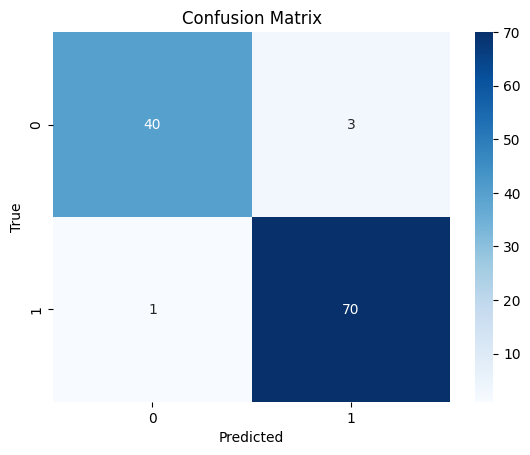

In [6]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Print classification report
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

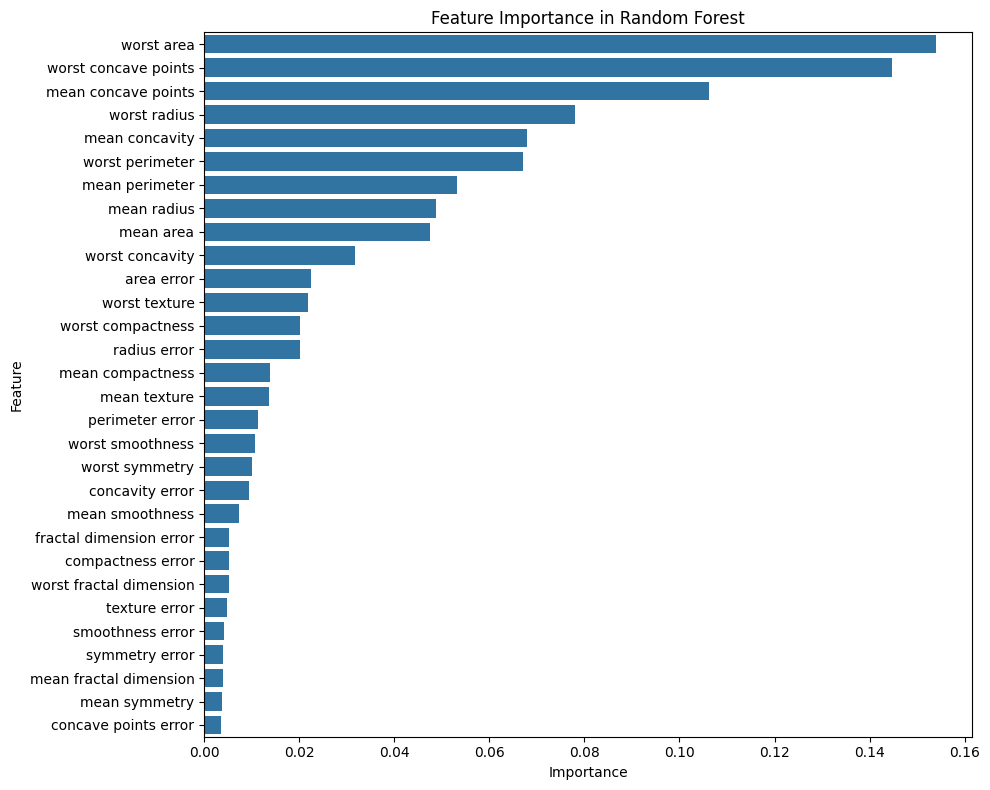

In [8]:
# Get feature importance
importances = rf_model.feature_importances_

# X is a NumPy array, so use the dataset's feature names instead
# (data.feature_names is provided by the sklearn loader)
feature_names = data.feature_names

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.tight_layout()
plt.show()

In [9]:
clf = RandomForestClassifier(class_weight='balanced')

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Define the model
clf = RandomForestClassifier(random_state=42)
# Define the hyperparameters and their possible values
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
# Fit the model to data
grid_search.fit(X_train, y_train)
# Best parameters found
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [13]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train an AdaBoost Classifier with Decision Trees as base learners
ada_clf = AdaBoostClassifier(
	estimator=DecisionTreeClassifier(max_depth=1), # Using shallow trees (weak learners)
	n_estimators=100, # Number of weak learners
	learning_rate=0.1, # Learning rate for updating weights
	random_state=42
)

ada_clf.fit(X_train, y_train)
# Make predictions
y_pred = ada_clf.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost Model: {accuracy * 100:.2f}%")

Accuracy of AdaBoost Model: 100.00%


## Mini Challenge: Mushroom Classification

Goal: Build a Random Forest to classify mushrooms as edible or poisonous with 95%+ accuracy

In [15]:
# import stuff we need
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# load the mushroom dataset from .data file
# the file has no headers so we need to add column names
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color',
                'ring-number', 'ring-type', 'spore-print-color',
                'population', 'habitat']

df = pd.read_csv('agaricus-lepiota.data', names=column_names)

# check it out
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nTarget distribution:")
print(df['class'].value_counts())
print("\nMissing values:")
print(df.isin(['?']).sum())

Dataset shape: (8124, 23)

First few rows:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w             

In [16]:
# handle missing values (? in stalk-root column)
# replace ? with the most common value
df = df.replace('?', np.nan)
df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)

# create a new feature by combining cap-color and odor
# this might help cuz odor is usually a strong indicator
df['cap_color_odor'] = df['cap-color'].astype(str) + '_' + df['odor'].astype(str)

# also try cap-shape with cap-surface
df['cap_shape_surface'] = df['cap-shape'].astype(str) + '_' + df['cap-surface'].astype(str)

# separate features and target
X = df.drop('class', axis=1)
y = df['class']

# encode all categorical columns to numbers
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

# split the data - use stratify to keep class balance
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts())

Training set size: (6499, 24)
Test set size: (1625, 24)

Class distribution in training set:
class
e    3366
p    3133
Name: count, dtype: int64


C:\Users\haadh\AppData\Local\Temp\ipykernel_21300\1044802954.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)


Baseline Model Performance:
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



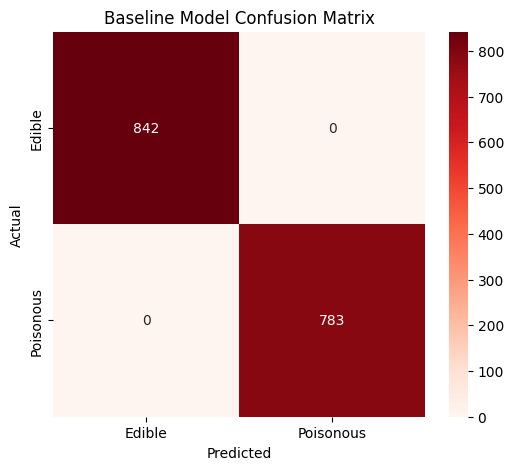

In [17]:
# baseline model - just to see how it performs without tuning
baseline_rf = RandomForestClassifier(n_estimators=100, random_state=42)
baseline_rf.fit(X_train, y_train)

# predictions
y_pred_baseline = baseline_rf.predict(X_test)

# check performance
print("Baseline Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline)*100:.2f}%")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline Model Confusion Matrix')
plt.show()

In [18]:
# use GridSearchCV to find best hyperparameters
# also prioritize safety by optimizing for recall on poisonous class

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', {'e':1, 'p':2}]  # give more weight to poisonous
}

# create scorer for poisonous recall
from sklearn.metrics import make_scorer
recall_poisonous = make_scorer(recall_score, pos_label='p')

# setup grid search
rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid,
    cv=3,
    scoring=recall_poisonous,  # optimize for poisonous recall
    verbose=1,
    n_jobs=-1
)

print("Running GridSearch... this might take a while")
grid_search.fit(X_train, y_train)

print("\nBest parameters found:")
print(grid_search.best_params_)
print(f"\nBest cross-validation score (poisonous recall): {grid_search.best_score_:.4f}")

Running GridSearch... this might take a while
Fitting 3 folds for each of 324 candidates, totalling 972 fits

Best parameters found:
{'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best cross-validation score (poisonous recall): 0.9984

Best parameters found:
{'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best cross-validation score (poisonous recall): 0.9984


Optimized Model Performance:
Accuracy: 100.00%
Precision (Poisonous): 1.0000
Recall (Poisonous): 1.0000
F1-Score (Poisonous): 1.0000

Full Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



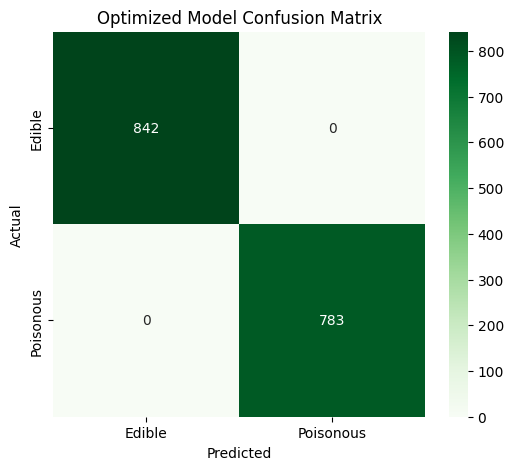


False Negatives (Dangerous!): 0
This is the number of poisonous mushrooms we wrongly classified as edible


In [22]:
# get the best model and evaluate it
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, pos_label='p')
recall = recall_score(y_test, y_pred_best, pos_label='p')
f1 = f1_score(y_test, y_pred_best, pos_label='p')

print("Optimized Model Performance:")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision (Poisonous): {precision:.4f}")
print(f"Recall (Poisonous): {recall:.4f}")
print(f"F1-Score (Poisonous): {f1:.4f}")
print("\nFull Classification Report:")
print(classification_report(y_test, y_pred_best))

# confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Optimized Model Confusion Matrix')
plt.show()

# check if we got false negatives (predicted edible but was poisonous)
false_negatives = cm_best[1, 0]
print(f"\nFalse Negatives (Dangerous!): {false_negatives}")
print("This is the number of poisonous mushrooms we wrongly classified as edible")

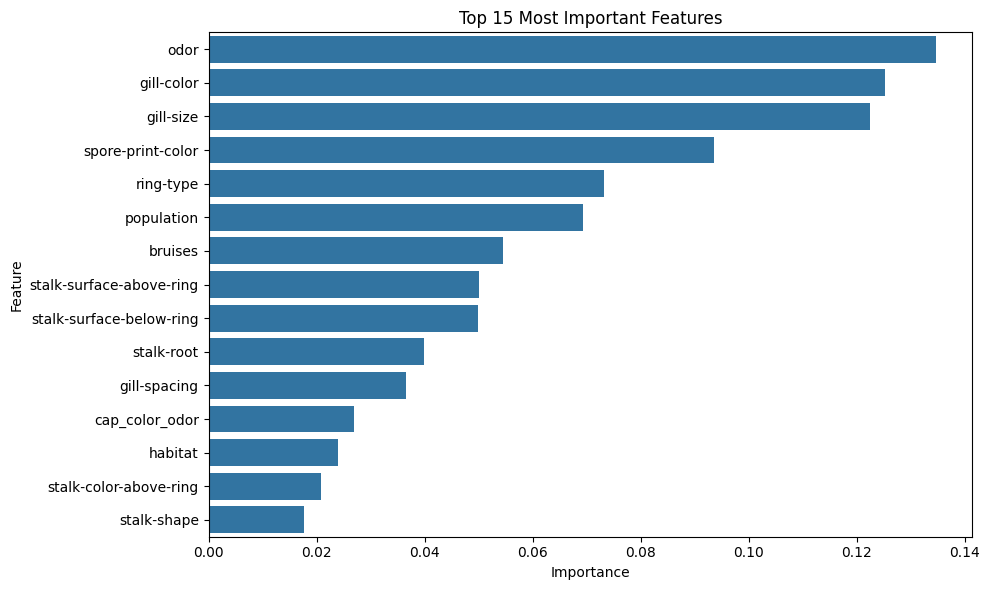

Top 10 Most Important Features:
                     Feature  Importance
4                       odor    0.134685
8                 gill-color    0.125170
7                  gill-size    0.122448
19         spore-print-color    0.093638
18                 ring-type    0.073271
20                population    0.069314
3                    bruises    0.054463
11  stalk-surface-above-ring    0.050071
12  stalk-surface-below-ring    0.049877
10                stalk-root    0.039980


In [20]:
# check feature importance to see what matters most
importances = best_rf.feature_importances_
feature_names = X_encoded.columns

# make a dataframe
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(15))
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_imp_df.head(10))

### Bonus: SHAP Explanations

Using SHAP to understand why specific mushrooms are classified as poisonous or edible

In [26]:
# install shap if needed
%pip install shap

import shap

# create explainer for the model
explainer = shap.TreeExplainer(best_rf)

# get shap values for test set (using a sample cuz it can be slow)
sample_size = 100
X_test_sample = X_test.sample(n=sample_size, random_state=42)
shap_values = explainer.shap_values(X_test_sample)

# shap_values is a list [values_for_class_0, values_for_class_1]
# we want poisonous class (assume it's index 1 or check with best_rf.classes_)
print("Classes:", best_rf.classes_)
poisonous_idx = list(best_rf.classes_).index('p')

# summary plot showing overall feature impact
shap.summary_plot(shap_values[poisonous_idx], X_test_sample, feature_names=feature_names, show=False)
plt.tight_layout()
plt.show()

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   -- ------------------------------------- 30.7/548.0 kB 1.4 MB/s eta 0:00:01
   ------ --------------------------------- 92.2/548.0 kB 1.1 MB/s eta 0:00:01
   ------ --------------------------------- 92.2/548.0 kB 1.1 MB/s eta 0:00:01
   ------ --------------------------------- 92.2/548.0 kB 1.1 MB/s eta 0:00:01
   ---------------- ----------------------- 225.3/548.0 kB 1.1 MB/s eta 0:00:01
   ---------------- ----------------------- 225.3/548.0 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 358.4/548.0 kB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 389.1/548.0 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- - 522.2/548.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 548.0/548.0 kB 1.2 MB/s eta 0:00:


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\haadh\OneDrive - National University of Sciences & Technology\5th semester\data visualization\labs\Code\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\haadh\OneDrive - National University of Sciences & Technology\5th semester\data visualization\labs\Code\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Classes: ['e' 'p']


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [23]:
# explain individual predictions
# pick a few examples - one predicted poisonous and one predicted edible

y_pred_sample = best_rf.predict(X_test_sample)
sample_indices = X_test_sample.index

# find one poisonous and one edible prediction
poisonous_example_idx = np.where(y_pred_sample == 'p')[0][0]
edible_example_idx = np.where(y_pred_sample == 'e')[0][0]

print("Explaining a POISONOUS prediction:")
print(f"Predicted: {y_pred_sample[poisonous_example_idx]}")
print(f"Actual: {y_test.loc[sample_indices[poisonous_example_idx]]}")

# force plot for poisonous example
shap.force_plot(
    explainer.expected_value[poisonous_idx],
    shap_values[poisonous_idx][poisonous_example_idx],
    X_test_sample.iloc[poisonous_example_idx],
    feature_names=feature_names,
    matplotlib=True,
    show=False
)
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("\nExplaining an EDIBLE prediction:")
print(f"Predicted: {y_pred_sample[edible_example_idx]}")
print(f"Actual: {y_test.loc[sample_indices[edible_example_idx]]}")

# force plot for edible example
shap.force_plot(
    explainer.expected_value[poisonous_idx],
    shap_values[poisonous_idx][edible_example_idx],
    X_test_sample.iloc[edible_example_idx],
    feature_names=feature_names,
    matplotlib=True,
    show=False
)
plt.tight_layout()
plt.show()

NameError: name 'X_test_sample' is not defined